In [35]:
import pandas as pd

# Load the dataset
file_path = './../data/price_elasticity_data.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(data.head())

       Product  Menu_Price  Pizza_Count  Profit_Percentage
0  Individuale      4.8200     6.583538          25.263382
1  Individuale      5.2500     6.763684          26.845586
2  Individuale      5.7500     6.690481          30.214454
3  Individuale      6.2275     6.138780          33.417930
4  Individuale      6.5500     5.977077          35.425975


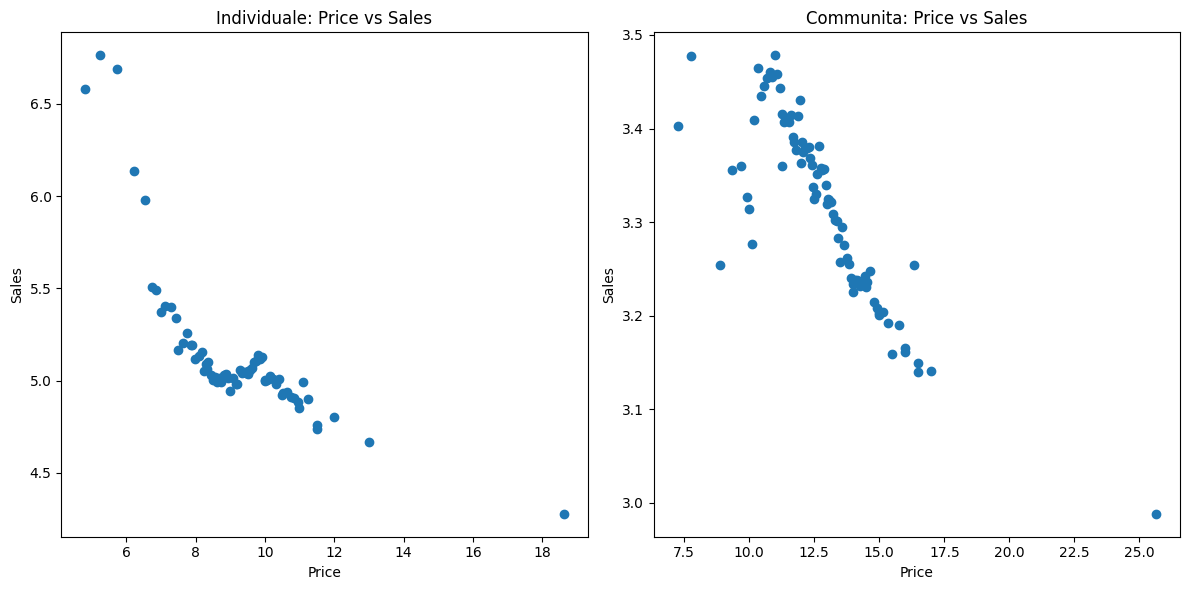

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = './../data/price_elasticity_data.csv'
data = pd.read_csv(file_path)

# Filter the data for each product
individuale_data = data[data['Product'] == 'Individuale']
communita_data = data[data['Product'] == 'Communita']

# Plot the relationship between price and sales for both products
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Individuale product
axs[0].scatter(individuale_data['Menu_Price'], individuale_data['Pizza_Count'])
axs[0].set_title('Individuale: Price vs Sales')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Sales')

# Communita product
axs[1].scatter(communita_data['Menu_Price'], communita_data['Pizza_Count'])
axs[1].set_title('Communita: Price vs Sales')
axs[1].set_xlabel('Price')
axs[1].set_ylabel('Sales')

plt.tight_layout()
plt.show()

In [37]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Function to calculate price elasticity
def calculate_elasticity(price, sales):
    log_price = np.log(price).values.reshape(-1, 1)
    log_sales = np.log(sales).values.reshape(-1, 1)
    model = LinearRegression().fit(log_price, log_sales)
    return model.coef_[0][0]

# Calculate elasticity for both products
elasticity_individuale = calculate_elasticity(individuale_data['Menu_Price'], individuale_data['Pizza_Count'])
elasticity_communita = calculate_elasticity(communita_data['Menu_Price'], communita_data['Pizza_Count'])

print(f'Price Elasticity for Individuale: {elasticity_individuale:.2f}')
print(f'Price Elasticity for Communita: {elasticity_communita:.2f}')

Price Elasticity for Individuale: -0.31
Price Elasticity for Communita: -0.13


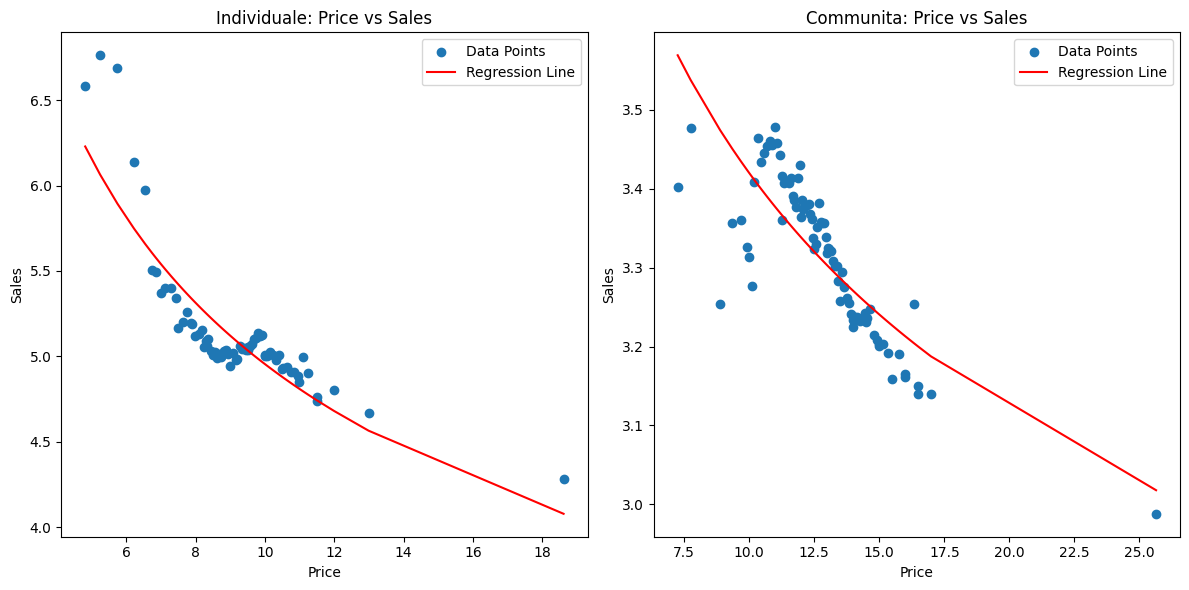

Price Elasticity for Individuale: -0.31
Price Elasticity for Communita: -0.13


In [38]:
# Function to plot scatter and regression line
def plot_price_vs_sales(price, sales, title, ax):
    ax.scatter(price, sales, label='Data Points')
    log_price = np.log(price).values.reshape(-1, 1)
    log_sales = np.log(sales).values.reshape(-1, 1)
    model = LinearRegression().fit(log_price, log_sales)
    predicted_sales = np.exp(model.predict(np.log(price).values.reshape(-1, 1)))
    ax.plot(price, predicted_sales, color='red', label='Regression Line')
    ax.set_title(title)
    ax.set_xlabel('Price')
    ax.set_ylabel('Sales')
    ax.legend()
    return model.coef_[0][0]

# Plot the relationship between price and sales for both products
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Individuale product
elasticity_individuale = plot_price_vs_sales(individuale_data['Menu_Price'], individuale_data['Pizza_Count'], 'Individuale: Price vs Sales', axs[0])

# Communita product
elasticity_communita = plot_price_vs_sales(communita_data['Menu_Price'], communita_data['Pizza_Count'], 'Communita: Price vs Sales', axs[1])

plt.tight_layout()
plt.show()

print(f'Price Elasticity for Individuale: {elasticity_individuale:.2f}')
print(f'Price Elasticity for Communita: {elasticity_communita:.2f}')

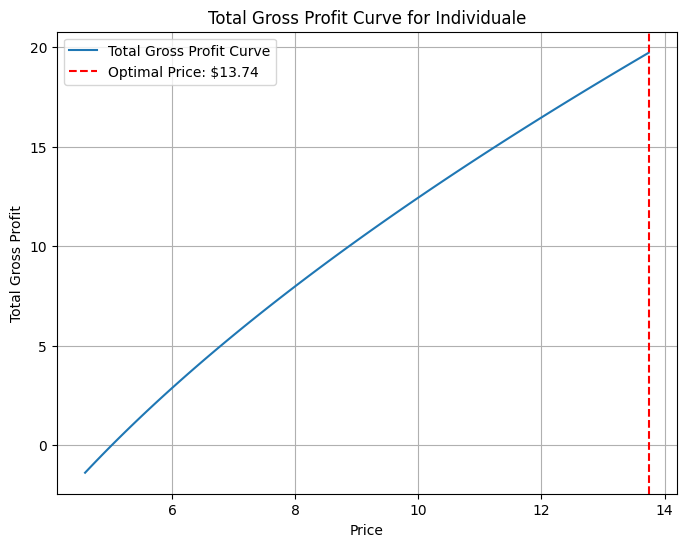

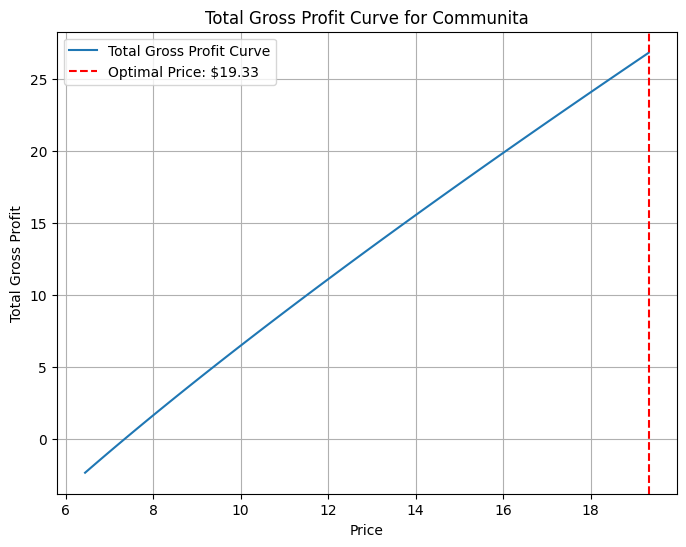

Optimal Price for Individuale: 13.74
Optimal Price for Communita: 19.33


In [39]:
# Define the total gross profit function
def total_gross_profit(price, base_sales, elasticity, cost):
    quantity = base_sales * (price ** elasticity)
    return quantity * (price - cost)

# Function to find the optimal price and plot total gross profit curve
def plot_gross_profit_curve(base_price, base_sales, elasticity, cost, product_name):
    prices = np.linspace(0.5 * base_price, 1.5 * base_price, 100)  # Generate a range of prices
    gross_profits = [total_gross_profit(price, base_sales, elasticity, cost) for price in prices]
    optimal_price = prices[np.argmax(gross_profits)]
    
    # Plot total gross profit curve
    plt.figure(figsize=(8, 6))
    plt.plot(prices, gross_profits, label='Total Gross Profit Curve')
    plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')
    plt.title(f'Total Gross Profit Curve for {product_name}')
    plt.xlabel('Price')
    plt.ylabel('Total Gross Profit')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return optimal_price

# Calculate base sales and price for both products
base_price_individuale = individuale_data['Menu_Price'].mean()
base_sales_individuale = individuale_data['Pizza_Count'].mean()
base_price_communita = communita_data['Menu_Price'].mean()
base_sales_communita = communita_data['Pizza_Count'].mean()

# Assuming costs for the products (you can adjust these values)
cost_individuale = individuale_data['Menu_Price'].mean() * (1 - individuale_data['Profit_Percentage'].mean() / 100)
cost_communita = communita_data['Menu_Price'].mean() * (1 - communita_data['Profit_Percentage'].mean() / 100)

# Find and plot the optimal price for both products
optimal_price_individuale = plot_gross_profit_curve(base_price_individuale, base_sales_individuale, elasticity_individuale, cost_individuale, 'Individuale')
optimal_price_communita = plot_gross_profit_curve(base_price_communita, base_sales_communita, elasticity_communita, cost_communita, 'Communita')

print(f'Optimal Price for Individuale: {optimal_price_individuale:.2f}')
print(f'Optimal Price for Communita: {optimal_price_communita:.2f}')